In [120]:
# Import necessary libraries
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

import os
import glob

import numpy as np

import umap

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


# Set seaborn style
sns.set(style="whitegrid")


In [104]:
def load_xml_data_from_directory(directory):
    """
    Load and parse XML files from a specified directory.
    
    Parameters:
    - directory: Path to the directory containing XML files.
    
    Returns:
    - DataFrame containing the combined data from all XML files.
    """
    all_data = []
    df = pd.DataFrame(all_data)
    xml_files = glob.glob(os.path.join(directory, '*.xml'))
    # print(f'xml file: {xml_files}')
    # file_path = '240506_49514579_GL_Z_F2000.xml'
    # tree = ET.parse('./data/240506_49514579_GL_Z_F2000.xml')

    # print(f"Tree: {tree}")
    # root = tree.getroot()
    # print(f"Root: {root}")
        
    # for entry in root.iter('rec'):
    #     # print(f'Entry: {entry}')
    #     # data_dict = {
    #     #         'time': float(entry.get('time')),
    #     #         'f1': float(entry.get('f1')),
    #     #         'f2': float(entry.get('f2')),
    #     #         'f3': float(entry.get('f3')),
    #     #         'f4': float(entry.get('f4')),
    #     #         'f5': float(entry.get('f5'))
    #     #     }
    #     rec_data = {
    #             'time': entry.attrib.get('time'),
    #             'f1': entry.attrib.get('f1'),
    #             'f2': entry.attrib.get('f2'),
    #             'f3': entry.attrib.get('f3'),
    #             'f4': entry.attrib.get('f4'),
    #             'f5': entry.attrib.get('f5')
    #             }
    #     # print(f'Data point found: {rec_data}')
    #     all_data.append(rec_data)
    # # print(f'All data in tree: {all_data}')
    # df = pd.DataFrame(all_data)

    # # Convert the columns to the appropriate data types
    # df = df.astype({'time': 'float', 'f1': 'float', 'f2': 'float', 'f3': 'float', 'f4': 'float', 'f5': 'float'})

    # # print(pd.DataFrame(all_data))

    for file in xml_files:
        all_data = []
        tree = ET.parse(file)
        file_path = file
        file_path = file_path.replace('./data/', '')

        # print(f"Tree: {tree}")
        root = tree.getroot()
        # print(f"Root: {root}")

        filename = os.path.basename(file_path)
        print(f'Filename: {filename}')
        date, equipment_nr, gl, axis, velocity = filename.split('_')
        # axis, velocity = axis_velocity.split('.')

        # Remove '.xml' from the velocity
        velocity = velocity.replace('.xml', '')

        # Add the metadata as new columns to the DataFrame
        # df['date'] = date
        # df['equipment_nr'] = equipment_nr
        # # df['gl'] = gl
        # df['axis'] = axis
        # df['velocity'] = velocity
        
        for entry in root.iter('rec'):
            # print(f'Entry: {entry}')
            # data_dict = {
            #         'time': float(entry.get('time')),
            #         'f1': float(entry.get('f1')),
            #         'f2': float(entry.get('f2')),
            #         'f3': float(entry.get('f3')),
            #         'f4': float(entry.get('f4')),
            #         'f5': float(entry.get('f5'))
            #     }
            rec_data = {
                    'time': entry.attrib.get('time'),
                    'f1': entry.attrib.get('f1'),
                    'f2': entry.attrib.get('f2'),
                    'f3': entry.attrib.get('f3'),
                    'f4': entry.attrib.get('f4'),
                    'f5': entry.attrib.get('f5'),
                    'date': date,
                    'equipment_nr': equipment_nr,
                    'axis': axis,
                    'velocity': velocity
                    }
            # print(f'Data point found: {rec_data}')
            all_data.append(rec_data)
            
    #     # print(f'All data in tree: {all_data}')
    #     # df.append(all_data)
        all_data = pd.DataFrame(all_data)
        df = pd.concat([df, all_data])

        # Convert the columns to the appropriate data types
        # df = df.astype({'time': 'float', 'f1': 'float', 'f2': 'float', 'f3': 'float', 'f4': 'float', 'f5': 'float'})
        
        # print(df)
    
    return df

    # for file in xml_files:
    #     # all_data = []
    #     tree = ET.parse(file)
    #     file_path = file
    #     file_path = file_path.replace('./datacopy/', '')

    #     # print(f"Tree: {tree}")
    #     root = tree.getroot()
    #     # print(f"Root: {root}")

    #     filename = os.path.basename(file_path)
    #     print(f'Filename: {filename}')
    #     date, equipment_nr, gl, axis, velocity = filename.split('_')
    #     # axis, velocity = axis_velocity.split('.')

    #     # Remove '.xml' from the velocity
    #     velocity = velocity.replace('.xml', '')
    #     name_data = {
    #         'date': date,
    #         'equipment_nr': equipment_nr,
    #         # 'gl': gl,
    #         'axis': axis,
    #         'velocity': velocity
    #     }
    #     all_data.append(name_data)
    # df = pd.DataFrame(all_data)

    # return df
    
    
   
    # for file_path in xml_files:
    #     print(f"File path: {file_path}")
    #     tree = ET.parse(file_path)
    #     tree = ET.parse('./data/240506_49514579_GL_Z_F2000.xml')

    #     print(f"Tree: {tree}")
    #     root = tree.getroot()
    #     # print(f"Root: {root}")
        
    #     for record in root.findall('rec'):
    #         print('In for loop')
    #         print(f"Record: {record}")
    #         data_dict = {
    #             'time': float(record.get('time')),
    #             'f1': float(record.get('f1')),
    #             'f2': float(record.get('f2')),
    #             'f3': float(record.get('f3')),
    #             'f4': float(record.get('f4')),
    #             'f5': float(record.get('f5'))
    #         }
    #         # print(data_dict)
    #         all_data.append(data_dict)
    #     # print(all_data)
    
    # print(f"Records found in {file_path}: {len(all_data)}")
    
    # Parse the filename to extract the metadata
    # filename = os.path.basename(file_path)
    # print(f'Filename: {filename}')
    # date, equipment_nr, gl, axis, velocity = filename.split('_')
    # # axis, velocity = axis_velocity.split('.')

    # # Remove '.xml' from the velocity
    # velocity = velocity.replace('.xml', '')

    # # Add the metadata as new columns to the DataFrame
    # df['date'] = date
    # df['equipment_nr'] = equipment_nr
    # # df['gl'] = gl
    # df['axis'] = axis
    # df['velocity'] = velocity

    # print(df)
    # return df





In [105]:

# Example usage:
directory_path = './data/'  # Change this to your data folder
name_path = './datacopy/'
maintenance_data = load_xml_data_from_directory(directory_path)
name_data = load_xml_data_from_directory(directory_path)
# print(maintenance_data)
# maintenance_data.head()

Filename: 230731_49514576_GL_C_F360.xml
Filename: 220124_49514579_GL_X_F4000.xml
Filename: 230731_49514576_GL_C_F360.xml
Filename: 220124_49514579_GL_X_F4000.xml


In [106]:
# Load example XML files (uncomment below to use actual file paths)
# maintenance_data = load_xml_data_from_directory(directory_path)

# Show data summary
# maintenance_data.info()
# maintenance_data.describe()
# maintenance_data.head()
name_data.describe()
# print(name_data['axis'].unique())
# print(name_data['velocity'].unique())
# print(name_data['equipment_nr'].unique())
# print()
for col in name_data:
    print(name_data[col].unique())

print(name_data['axis'].value_counts())
print(name_data['velocity'].value_counts())
print(name_data['equipment_nr'].value_counts())
er = name_data['equipment_nr'].value_counts()

['0.000000' '0.002000' '0.004000' ... '119.776000' '119.778000'
 '119.780000']
['0.000000' None '-360.000000' ... '-359.999444' '-359.999857'
 '-359.999964']
['0.000004' '-0.000012' '-0.000022' ... '-0.002759' '-0.002575'
 '-0.002363']
['0.000000' None '0.000020' ... '-359.997227' '-359.997422' '-359.997637']
['0.392731' '0.448175' None ... '-760.985990' '-760.986290' '-760.986547']
['-0.000011' '0.000011' '0.000021' ... '-0.627747' '-0.674744' '-0.738525']
['230731' '220124']
['49514576' '49514579']
['C' 'X']
['F360' 'F4000']
axis
C    59891
X    11543
Name: count, dtype: int64
velocity
F360     59891
F4000    11543
Name: count, dtype: int64
equipment_nr
49514576    59891
49514579    11543
Name: count, dtype: int64


In [107]:
# Unique axis are X, Y, Z, A, C
# Unique velocity are ['F2000' 'F1000' 'F360' 'F6000' 'F4000' 'F720' 'F300' 'F420']
# Unique equipment_nr are ['49514576' '49514571' '49514580' '49514579' '49515264' '49514136' '49514569']

# F1000 has many recordings as rec s
# Unique counts are X:50, Z:48, C:48, Y:48, A:47
# Unique counts are F6000:49, F4000:49, F2000:48, F360:32, F1000:16, F720:16, F420:16, F300:15
er

equipment_nr
49514576    59891
49514579    11543
Name: count, dtype: int64

In [108]:
name_data.groupby(['equipment_nr','velocity','axis']).size().reset_index().rename(columns={0:'count'})

,equipment_nr,velocity,axis,count
0,49514576,F360,C,59891
1,49514579,F4000,X,11543


In [109]:
# All combinations / groups of equipment_nr, velocity and axis are in pair (total count of 2)

In [110]:
name_data.groupby(['equipment_nr','velocity']).size().reset_index()

,equipment_nr,velocity,0
0,49514576,F360,59891
1,49514579,F4000,11543


In [7]:
# Visualize the distributions of the features
feature_cols = ['f1', 'f2', 'f3', 'f4', 'f5']

for feature in feature_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(maintenance_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    break

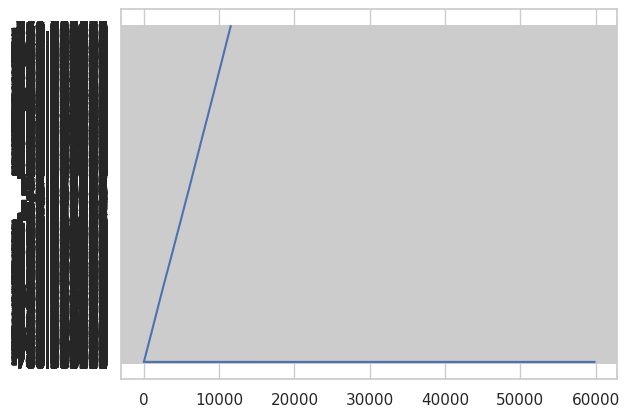

In [111]:
# plt.plot(maintenance_data["f4"])
# plt.show()
# import matplotlib.pyplot as plt

# Filter out rows with None values
filtered_data = maintenance_data.dropna()

# Plot the filtered data
plt.plot(filtered_data["f4"])
plt.show()

f2 Maintenance data 0         0.000004
1        -0.000012
2        -0.000022
3        -0.000021
4        -0.000021
           ...    
11538    -0.003316
11539    -0.003001
11540    -0.002759
11541    -0.002575
11542    -0.002363
Name: f2, Length: 71434, dtype: object


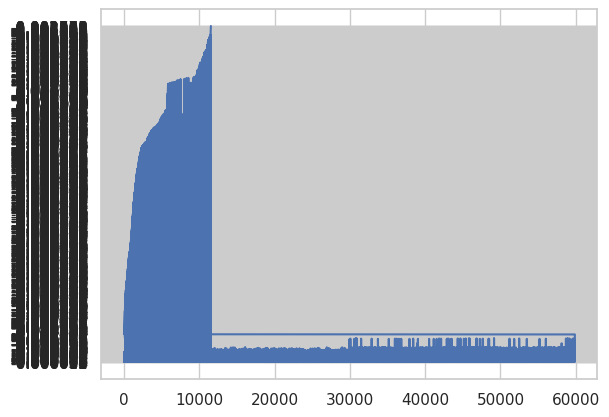

In [112]:
print(f'f2 Maintenance data {maintenance_data["f2"]}')
plt.plot(maintenance_data["f2"])
plt.show()

# plt.plot(maintenance_data['time'], maintenance_data['f2'])
# plt.show()

In [74]:
print(maintenance_data["f2"].max())
print(maintenance_data["f2"].min())

0.008345
-0.000000


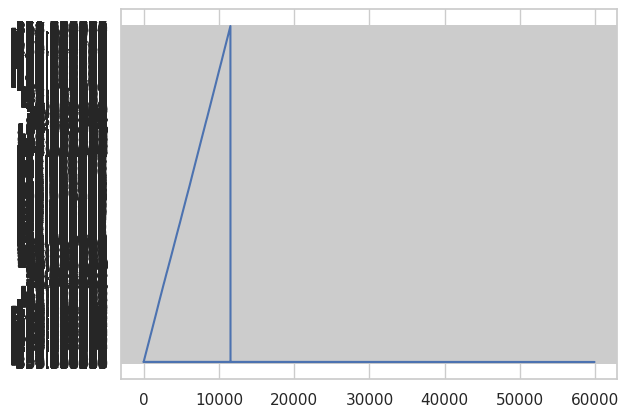

In [79]:
plt.plot(filtered_data["f1"])
plt.show()

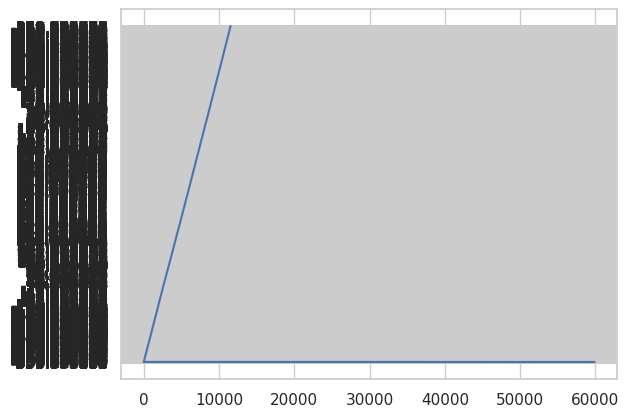

In [81]:
plt.plot(filtered_data["f3"])
plt.show()

In [82]:
print(filtered_data.describe())

            time           f1         f2        f3           f4         f5  \
count      10893        10893      10893     10893        10893      10893   
unique     10892        10890       1626     10892        10893        502   
top     0.000000  -360.000000  -0.000054  0.000000  -760.986547  -0.929871   
freq           2            3         33         2            1        157   

          date equipment_nr   axis velocity  
count    10893        10893  10893    10893  
unique       2            2      2        2  
top     220124     49514579      X    F4000  
freq     10891        10891  10891    10891  


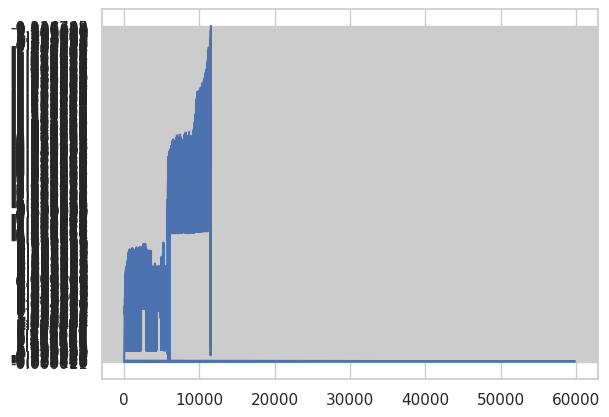

In [83]:
plt.plot(filtered_data["f5"])
plt.show()

In [84]:
# So comments:
# In general can be seen that f2,f3,f5 have incrementive and normal behaviour
# Behaviour in f1 is really chaotic with increasing chaos and increasing upper bound
# Behaviour in f4 is less chaotic than f1 and has a sudden jump in middle of the time.

In [85]:
# Split the data into training and testing sets
filtered_data[:-10]

,time,f1,f2,f3,f4,f5,date,equipment_nr,axis,velocity
0,0.000000,0.000000,0.000004,0.000000,0.392731,-0.000011,230731,49514576,C,F360
59890,119.780000,0.000000,-0.000072,0.000000,-0.346527,0.000129,230731,49514576,C,F360
0,0.000000,-360.000000,-0.002264,-359.997734,-760.986242,-0.768738,220124,49514579,X,F4000
5,0.010000,-359.999973,-0.001240,-359.998760,-760.987363,-0.822449,220124,49514579,X,F4000
6,0.012000,-359.999787,-0.001094,-359.998906,-760.987511,-0.829163,220124,49514579,X,F4000
...,...,...,...,...,...,...,...,...,...,...
11517,23.034000,-359.944703,-0.006868,-359.742598,-760.727592,0.966797,220124,49514579,X,F4000
11518,23.036000,-359.956718,-0.006808,-359.776260,-760.761333,0.903015,220124,49514579,X,F4000
11519,23.038000,-359.966853,-0.006507,-359.806982,-760.792041,0.879517,220124,49514579,X,F4000
11520,23.040000,-359.975268,-0.006174,-359.834717,-760.819826,0.842590,220124,49514579,X,F4000


In [115]:
# features

print(filtered_data.var(axis='rows', numeric_only=True)) 

Series([], dtype: float64)


In [125]:
from sklearn import cluster


feature_cols = ['time', 'f1', 'f2', 'f3', 'f4', 'f5']
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_data[feature_cols])

# Dimensionality reduction using UMAP
reducer = umap.UMAP()
umap_result = reducer.fit_transform(filtered_data[feature_cols])

# Clustering using HDBSCAN
clusterer = cluster.HDBSCAN()
cluster_labels = clusterer.fit_predict(umap_result)

# Add PCA, UMAP, and cluster labels to the dataframe
filtered_data['pca_one'] = pca_result[:, 0]
filtered_data['pca_two'] = pca_result[:, 1]
filtered_data['umap_one'] = umap_result[:, 0]
filtered_data['umap_two'] = umap_result[:, 1]
filtered_data['cluster'] = cluster_labels


/tmp/ipykernel_11866/329972144.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['pca_one'] = pca_result[:, 0]
/tmp/ipykernel_11866/329972144.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['pca_two'] = pca_result[:, 1]
/tmp/ipykernel_11866/329972144.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [126]:
filtered_data

,time,f1,f2,f3,f4,f5,date,equipment_nr,axis,velocity,pca_one,pca_two,umap_one,umap_two,cluster
0,0.000000,0.000000,0.000004,0.000000,0.392731,-0.000011,230731,49514576,C,F360,199.175061,51.179698,1.740930,9.017261,522
59890,119.780000,0.000000,-0.000072,0.000000,-0.346527,0.000129,230731,49514576,C,F360,198.747475,167.192056,1.873170,8.938219,522
0,0.000000,-360.000000,-0.002264,-359.997734,-760.986242,-0.768738,220124,49514579,X,F4000,-656.124263,-11.166383,14.424500,-10.245541,29
5,0.010000,-359.999973,-0.001240,-359.998760,-760.987363,-0.822449,220124,49514579,X,F4000,-656.125492,-11.150255,14.421791,-10.246379,29
6,0.012000,-359.999787,-0.001094,-359.998906,-760.987511,-0.829163,220124,49514579,X,F4000,-656.125555,-11.147540,14.424303,-10.246912,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11527,23.054000,-359.999444,-0.005341,-359.956230,-760.942760,0.295410,220124,49514579,X,F4000,-656.074921,11.060050,-6.217870,-9.484053,0
11528,23.056000,-359.999857,-0.005551,-359.965020,-760.951881,0.137634,220124,49514579,X,F4000,-656.085514,11.080118,-6.223557,-9.488597,0
11529,23.058000,-359.999964,-0.005802,-359.972188,-760.959415,-0.016785,220124,49514579,X,F4000,-656.094078,11.099957,-6.226238,-9.492025,0
11530,23.060000,-360.000000,-0.005892,-359.978096,-760.965571,-0.144348,220124,49514579,X,F4000,-656.101075,11.116686,-6.226615,-9.491605,0


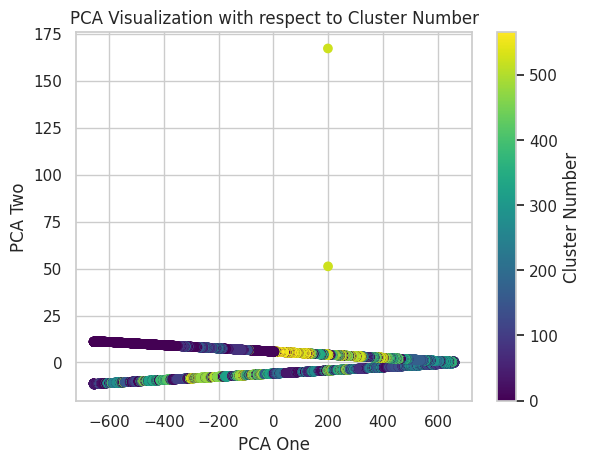

In [127]:
# import matplotlib.pyplot as plt

# Filter the data based on the cluster number
filtered_data = filtered_data[filtered_data['cluster'].notnull()]

# Create a scatter plot
plt.scatter(filtered_data['pca_one'], filtered_data['pca_two'], c=filtered_data['cluster'], cmap='viridis')
plt.xlabel('PCA One')
plt.ylabel('PCA Two')
plt.title('PCA Visualization with respect to Cluster Number')
plt.colorbar(label='Cluster Number')
plt.show()